In [17]:
# Please don't change this cell, but do make sure to run it.
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
answer_words = pd.read_csv('edited_data.csv')

In [18]:
def capitalize(variable):
    return variable.capitalize()

answer_words["Geography"] = answer_words["Geography"].apply(capitalize)

In [19]:
answer_words = answer_words.drop(columns = ["RowNumber", "Unnamed: 0"])


In [20]:
answer_words["CustomerId"].unique().shape[0]
answer_words = answer_words.set_index("CustomerId")

<AxesSubplot:ylabel='Frequency'>

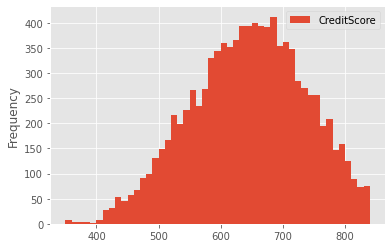

In [21]:
answer_words = answer_words[answer_words["CreditScore"] <= 850]
answer_words.plot(kind="hist", x="Age", y="CreditScore", bins=np.arange(350,850, 10))

In [22]:
zeroZ = answer_words[(answer_words["Exited"] == 0) & (answer_words["IsActiveMember"] == 0)].shape[0]
zeroO = answer_words[(answer_words["Exited"] == 0) & (answer_words["IsActiveMember"] == 1)].shape[0]
oneZ = answer_words[(answer_words["Exited"] == 1) & (answer_words["IsActiveMember"] == 0)].shape[0]
oneO = answer_words[(answer_words["Exited"] == 1) & (answer_words["IsActiveMember"] == 1)].shape[0]
a = zeroZ/(zeroZ+oneO+oneZ+zeroO)
b = zeroO/(zeroZ+oneO+oneZ+zeroO)
c = oneZ/(zeroZ+oneO+oneZ+zeroO)
d = oneO/(zeroZ+oneO+oneZ+zeroO)
print("Have not Exited and are not active " + str(a))
print("Have not Exited and are active " + str(b))
print("Have Exited and are not active " + str(c))
print("Have Exited and are active " + str(d))

Have not Exited and are not active 0.35490668272125225
Have not Exited and are active 0.4416014449127032
Have Exited and are not active 0.12984146096728877
Have Exited and are active 0.07365041139875576


In [23]:
answer_words

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1,101348.88,1.0
15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,0.0
15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0,93826.63,0.0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.1,1,1,79084.10,0.0
15592531,Bartlett,822,France,Male,50,7,0.00,2.1,1,1,10062.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0,96270.64,0.0
15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1,101699.77,0.0
15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1,42085.58,1.0


In [141]:
answer_words["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [144]:
answer_words["Gender"].unique()

array(['Female', 'Male'], dtype=object)

Display histogram of Revenue by Country

In [56]:
geo_revenue = answer_words[['Geography', 'Balance']]
geo_revenue = geo_revenue[geo_revenue['Balance'] > 0]
france = geo_revenue[geo_revenue['Geography'] == 'France']
germany = geo_revenue[geo_revenue['Geography'] == 'Germany']
spain = geo_revenue[geo_revenue['Geography'] == 'Spain']

Text(0.5, 0, 'Balance')

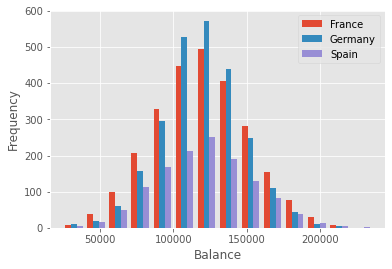

In [63]:
plt.hist([france['Balance'], germany['Balance'], spain['Balance']], bins=np.arange(25000, 250000, 15000), label=['France', 'Germany', 'Spain'])
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Balance")

Display Revenue to Tenure

<AxesSubplot:xlabel='Tenure', ylabel='Balance'>

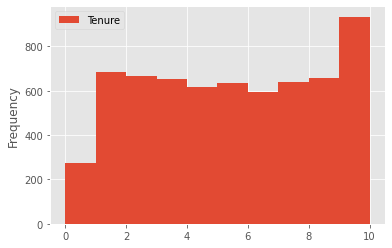

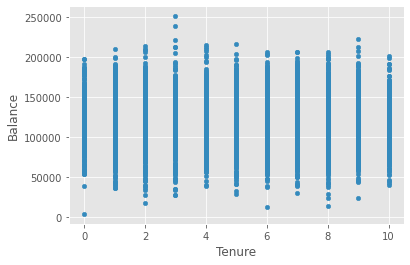

In [84]:
rev_ten = answer_words[['Tenure', 'Balance']]
rev_ten = rev_ten[rev_ten['Balance'] > 0]
rev_ten.plot(kind="hist", x="Balance")
rev_ten.plot(kind="scatter", x="Tenure", y="Balance")

# plt.hist(x=rev_ten['Tenure'], y=rev_ten['Balance'], bins=10)
# plt.legend(loc='upper right')


Display Revenue By Age

<AxesSubplot:xlabel='Age', ylabel='Balance'>

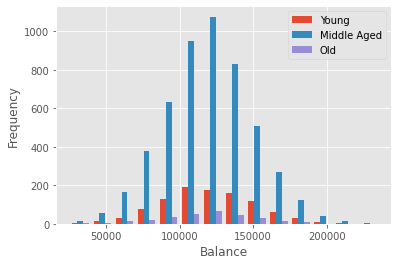

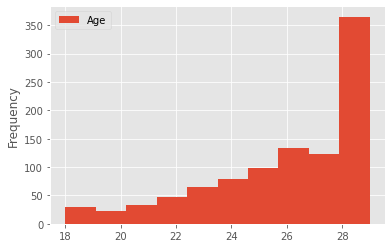

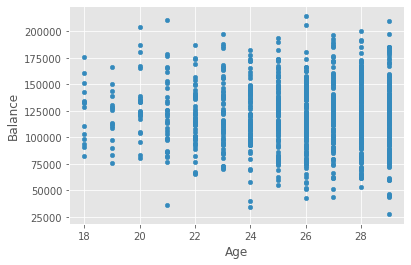

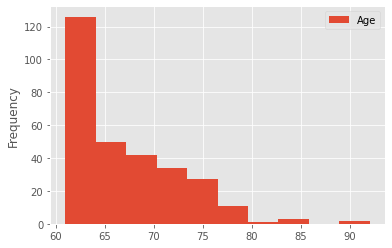

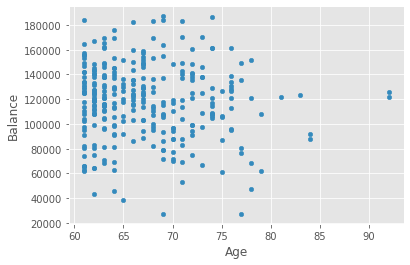

In [105]:
rev_age = answer_words[['Age', 'Balance']]
rev_age = rev_age[rev_age['Balance'] > 0]

rev_age_young = rev_age[rev_age['Age'] < 30]
rev_age_old = rev_age[rev_age['Age'] > 60]
rev_age_middle = rev_age[(rev_age['Age'] >= 30) & (rev_age['Age'] <= 60)]

plt.hist([rev_age_young['Balance'],rev_age_middle['Balance'], rev_age_old['Balance']], bins=np.arange(25000, 250000, 15000), label=['Young', 'Middle Aged', 'Old'])
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Balance")

rev_age_young.plot(kind="hist", x="Balance")
rev_age_young.plot(kind="scatter", x="Age", y="Balance")
rev_age_old.plot(kind="hist", x="Balance")
rev_age_old.plot(kind="scatter", x="Age", y="Balance")

Revenue By Gender

Text(0.5, 0, 'Balance')

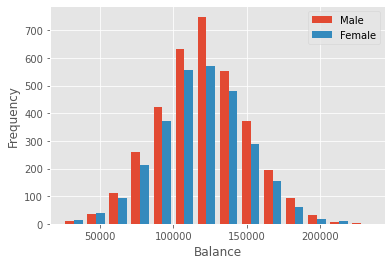

In [101]:
rev_gender = answer_words[['Gender', 'Balance']]
rev_gender = rev_gender[rev_gender['Balance'] > 0]
rev_male = rev_gender[rev_gender['Gender'] == 'Male']
rev_female = rev_gender[rev_gender['Gender'] == 'Female']

plt.hist([rev_male['Balance'], rev_female['Balance']], bins=np.arange(25000, 250000, 15000), label=['Male', 'Female'])
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Balance")